In [45]:
%matplotlib inline
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [46]:
#data fields, will need to be replaced with a text document input for better usage
def __p(phi):
    return phi*phi*phi*(10-15*phi+6*phi*phi)

def __g(phi):
    return (phi*phi*(1-phi)*(1-phi))

def __gprime(phi):
    return (4*phi*phi*phi - 6*phi*phi +2*phi)

_p = np.vectorize(__p)
_g = np.vectorize(__g) 
_gprime = np.vectorize(__gprime)

def gradx(phi, dx):
    phim = np.roll(phi, -1, 0)
    phip = np.roll(phi, 1, 0)
    return (phip-phim)/(2*dx)

def grady(phi, dx):
    phim = np.roll(phi, -1, 1)
    phip = np.roll(phi, 1, 1)
    return (phip-phim)/(2*dx)

def gradxx(phi, dx):
    phim = np.roll(phi, -1, 0)
    phip = np.roll(phi, 1, 0)
    return (phip+phim-2*phi)/(dx*dx)

def gradyy(phi, dx):
    phim = np.roll(phi, -1, 1)
    phip = np.roll(phi, 1, 1)
    return (phip+phim-2*phi)/(dx*dx)

In [50]:
#material parameters
T_mA = 1728 #melting point of nickel
T_mB = 1358 #melting point of copper
L_A = 2.35e9 #latent heat of nickel, J/m^3
L_B = 1.728e9 #latent heat of copper, J/m^3
s_A = 0.37 #surface energy of nickel, J/m^2
s_B = 0.29 #surface energy of copper, J/m^2
#s_A = 0.0005 #surface energy of nickel, J/m^2
#s_B = 0.0005 #surface energy of copper, J/m^2
D_L = 1e-9 #diffusion in liquid, m^2/s
D_S = 1e-13 #diffusion in solid, m^2/s
B_A = 0.0033 #linear kinetic coefficient of nickel, m/K/s
B_B = 0.0039 #linear kinetic coefficient of copper, m/K/s
v_m = 7.42e-6 #molar volume, m^3/mol
R = 8.314 #gas constant, J/mol*K
y_e = 0.06 #anisotropy

In [51]:
np.set_printoptions(threshold=np.inf)
T = 1574
res = 300
dx = 4.6e-8 #spacial division, m
dt = dx*dx/5./D_L
print(dt)
d = dx/0.94 #interfacial thickness
ebar = np.sqrt(6*np.sqrt(2)*s_A*d/T_mA) #baseline energy

W_A = 3*s_A/(np.sqrt(2)*T_mA*d)
W_B = 3*s_B/(np.sqrt(2)*T_mB*d)
M_A = T_mA*T_mA*B_A/(6*np.sqrt(2)*L_A*d)
M_B = T_mB*T_mB*B_B/(6*np.sqrt(2)*L_B*d)
ebar = np.sqrt(6*np.sqrt(2)*s_A*d/T_mA)

c = np.zeros((res,res))
phi = np.zeros((res, res))
c += 0.40831
#c += 0.001*np.random.rand(res, res)
phi += 1
diamondParam = 100
for i in range(diamondParam):
    phi[(res/2-i):(res/2+i), (res/2-(diamondParam-i)):(res/2+(diamondParam-i))] = 0


#print(z)
#print(slope)
#print(curv)

4.232e-07


0
0.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
2.90876306378e-14
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1.87563586518e-10
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
6.43446044911e-10
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
6.1070074871e-10
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
3.86987725035e-10
251
252
253
2

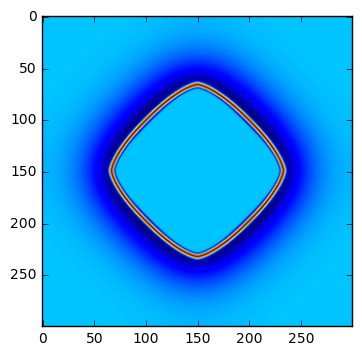

In [52]:
for i in range(2001):
    print(i)
    g = _g(phi)
    p = _p(phi)
    gprime = _gprime(phi)
    H_A = W_A*gprime + 30*L_A*(1/T-1/T_mA)*g
    H_B = W_B*gprime + 30*L_B*(1/T-1/T_mB)*g
    phixx = gradxx(phi, dx)
    phiyy = gradyy(phi, dx)
    lphi = phixx+phiyy
    phix = gradx(phi, dx)
    phiy = grady(phi, dx)
    phixy = grady(phix, dx)
    
    #change in c
    D_C = D_S+p*(D_L-D_S)
    temp = D_C*v_m*c*(1-c)*(H_B-H_A)/R
    deltac = D_C*(gradxx(c, dx)+gradyy(c, dx))+(gradx(D_C, dx)*gradx(c, dx)+grady(D_C, dx)*grady(c, dx))+temp*(lphi)+(gradx(temp, dx)*phix+grady(temp, dx)*phiy)
    
    #change in phi
    theta = np.arctan2(phiy, phix)
    eta = 1+y_e*np.cos(4*theta)
    etap = -4*y_e*np.sin(4*theta)
    etapp = -16*(eta-1)
    c2 = np.cos(2*theta)
    s2 = np.sin(2*theta)
    M_phi = (1-c)*M_A + c*M_B
    deltaphi = M_phi*((ebar*ebar*eta*eta*lphi-(1-c)*H_A-c*H_B)+ebar*ebar*eta*etap*(s2*(phiyy-phixx)+2*c2*phixy)+0.5*ebar*ebar*(etap*etap+eta*etapp)*(-2*s2*phixy+lphi+c2*(phiyy-phixx)))
    randArray = 2*np.random.rand(res, res)-1
    alpha = 0.3
    deltaphi += M_phi*alpha*randArray*(16*g)*((1-c)*H_A+c*H_B)
    
    #alternate change in phi
    #theta = np.arctan2(phiy, phix)
    #eta = 1+y_e*np.cos(4*theta)
    #d_A = s_A/L_A
    #d_B = s_B/L_B
    #print(d_A, d_B, d)
    #M_phi = (1-c)*M_A + c*M_B
    #deltaphi = (M_phi*ebar*ebar*eta*eta/(d*d))*(d*d*lphi-0.25*gprime-(5*g*d/(np.sqrt(2)*d_A))*((1-c)*(T_mA/T-1)+(c*d_A/d_B)*(T_mB/T-1)))
    
    #apply changes
    ctemp = c.copy()
    c += deltac*dt
    phi += deltaphi*dt
    #print(ctemp[20, 20], c[20, 20], deltac[20, 20]*dt)
    
    if(i%50 == 0):
        plt.imshow(phi)
        plt.savefig('100_phi'+str(i)+'.png')
        plt.imshow(c)
        plt.savefig('100_c'+str(i)+'.png')
        print(phi[100, 150])
        #f = open('rawData_'+str(i)+'.txt','w')
        #f.write(np.array_str(c))
        #f.write('\n')
        #f.write(np.array_str(phi))
        #f.close()


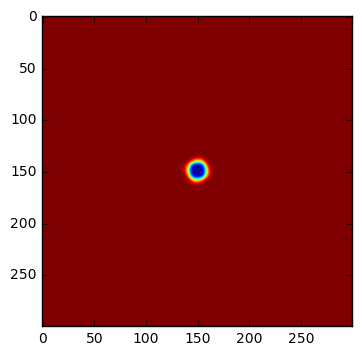

In [10]:
plt.imshow(phi)